# Subhranil Sarkar
# M.Sc. Data Science | 2nd Semester
# Roll: 96/DTS   No.: 210018
# Reg. No.: 020873    of 2018-2019

## Assignment on Search Algorithms

## 1. Write a program to implement the following search problem: Considering S as the initial state, solve the above search problem using:
- breadth-first search
- depth-first search
- A* search with the heuristic above


In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod
from collections import deque
import numpy as np
import heapq
import networkx as nx
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

In [2]:
class Problem(ABC):
    """
    Blueprint of the various problems i.e., Abstract class of the problems
    """
    def __init__(self, initial: str, goal: str = None):
        self.initial: str = initial      # initial state
        self.goal: str = goal            # goal state
        
        
    @abstractmethod
    def actions(self, state: str):
        """
        getting the children (list of child) of a node
        
        :param state: current state
        :raises ImplementationError: If not implemented in the extended class 
        """
        pass
    
    
    def goal_test(self, state: str) -> bool:
        """
        Test for the state is the goal state or not
        
        :param state: current state
        :returns: if the self.goal and current state are same then returns True ele False
        """
        return state == self.goal

In [3]:
class GraphProblem(Problem):
    """
    Extends from the abstract class Problem, it represents the Graph related problems
    like Travelling in Romania problem, etc.
    """
    def __init__(self, initial: str, goal: str, graph: Graph):
        """
        constructor of the GraphProblem
        
        :param initial: initial state of the proble
        :param goal: goal state of the problem
        :param graph: Graph instance of the problem
        """
        super().__init__(initial, goal)
        self.graph = graph  
        
        
    def actions(self, A: str) -> list:
        """
        neighbor or child of the parent
        
        :param A: the node to be expanded to get the list of the children
        :returns: list of the children
        """
        return list(self.graph.get(A))
    
    
    def path_cost(self, cost_so_far, A, B):
        """
        calculate path cost
        """
        return cost_so_far + self.graph.get(A, B)
    
    
    def h(self, node):
        """
        heuristic value
        """
        heuristic_values = getattr(self.graph, 'heuristics', None)
        
        return heuristic_values[node]

In [4]:
class Graph:
    """
    Graph class
    
    """
    def __init__(self, graph_dict: dict = None, directed: bool = True):
        """
        constructor of the Graph
        
        :param graph_dict: dictionary representation of the problem
        :param directed: if the dictionary is directed or not
        """
        self.graph_dict: dict = graph_dict or {}     
        self.directed: bool = directed
        
        # convert the directed graph into the undirected one
        if not directed:
            self.make_undirected()
            
            
    def make_undirected(self):
        """
        Algorithm to converts the directed graph into an undirected one.
        """
        for parent in list(self.graph_dict.keys()):    # parent: keys of the dict
            for child in self.graph_dict[parent]:      # each child of the parent 
                
                # if the child is in the dict i.e., there exists a key in the dict named as the current child
                if child in self.graph_dict:
                    # if the parent of which the current child is generated
                    # is not the list of the child's value
                    if parent not in self.graph_dict[child]:
                        # update the list of child's value
                        # add the parent in the child's value list
                        self.connect(child, parent)
                
                # if the child doesn't exist in the dict
                else:
                    # create the child key with a empty list in the dict
                    # and append the parent in the list
                    self.connect(child, parent)

                           
    def connect(self, A: str, B: str):
        """
        Create a key if not in the dict OR Update the list of the existing key's value
        
        :param A: key of the dict to be craeted or selected for update
        :param B: value to be inserted in the list of the key's value
        """
        self.graph_dict.setdefault(A, []).append(B)
        
        
    def get(self, a: str, b=None):
        """
        Class method to get the value of a key of the dict
        :param a: the key to get the value from it
        :returns: if key a not exists then returns empty dict or the a's values
        """
        links = self.graph_dict.setdefault(a, {})
        if b:
            return links.get(b)
        else:
            return links

    

def UndirectedGraph(graph_dict: dict = None) -> Graph:
    """
    Creating the undirected graph
    :param graph_dict: dictionary of the problem
    :returns: undirected representation of the graph as a Graph instance
    """
    return Graph(graph_dict=graph_dict, directed=False)

In [5]:
class Node:
    """
    Node class
    
    """
    def __init__(self, state: str, parent: Node = None, path_cost=0):
        """
        constructor of the Node class
        :param state: current state
        :param parent: previous node from which the current node is expanded, default None
         """
        self.state: str = state
        self.parent: Node = parent
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    
    def __repr__(self):
        """ Overrides the 'repr' method """ 
        return f"<Node {self.state}>"
    
    
    def __lt__(self, other):
        """Compares two nodes"""
        return self.state < other.state

    
    def expand(self, problem: GraphProblem) -> list[Node]:
        """
        Expand the current node or state
        :param problem: Problem instance
        :returns: the list of the child nodes 
         """
        return [self.child_node(action) for action in problem.actions(self.state)]

    
    def child_node(self, action: str) -> Node:
        """
        create a child node with the
        > state: child state
        > parent: current Node
        > and path cost to get to the child
        
        :param action: child state
        :returns: child Node instance
        
        """
        next_node = Node(action, self, problem.path_cost(self.path_cost, self.state, action))
        
        return next_node

    
    def path(self) -> list[Node]:
        """
        Gives the path from start to goal node
        """
        node: Node = self           # node: current Node
        path_back: list = list()    # path_back: empty list
              
        while node:
            # append the node in the path_back
            path_back.append(node)  

            # now the current node is the parent of the current node
            node = node.parent      

        # returns the reversed list of the path     
        return path_back[::-1]

    
def print_path(path: list):
    """Print the path from start to goal"""
    [print(p.state, end=" => ") if i != len(path) - 1 else print(p.state) for i, p in enumerate(path)]

In [6]:
class PriorityQueue:
    def __init__(self, order='min', f=lambda x: x):
        """
        Constructor method of the priority queue. 
        returns minimum value if 'min' and max value if 'max' 
        priority depends on the function f
        """
        self.heap = []
        if order == 'min':
            self.f = f
        elif order == 'max':
            self.f = lambda x: -f(x)
        else:
            raise ValueError('Order must be min or max')
            
        
    def append(self, item):
        """Insert element in the priority queue"""
        heapq.heappush(self.heap, (self.f(item), item))
        
    
    def extend(self, items):
        """Extends list of elements in the priority queue"""
        for item in items:
            self.append(item)
            
            
    def pop(self):
        """Returns the most priority value and deleted it from the priority queue"""
        if self.heap:
            return heapq.heappop(self.heap)[1]
        else:
            raise Exception('Trying to pop from empty PriorityQueue.')
            
            
    def __len__(self):
        """Return current capacity of priority queue."""
        return len(self.heap)

    
    def __contains__(self, key):
        """Return True if the key is in priority queue."""
        return any([item == key for _, item in self.heap])

    
    def __getitem__(self, key):
        """Returns the first value associated with key in priority queue.
        Raises KeyError if key is not present."""
        for value, item in self.heap:
            if item == key:
                return value
        raise KeyError(str(key) + " is not in the priority queue")
        

    def __delitem__(self, key):
        """Delete the first occurrence of key."""
        try:
            del self.heap[[item == key for _, item in self.heap].index(True)]
        except ValueError:
            raise KeyError(str(key) + " is not in the priority queue")
        heapq.heapify(self.heap)

## Search Algorithms

### Breadth First Graph Search

In [7]:
def breadth_first_search(problem: GraphProblem) -> list | None:
    """
    Breadth First Search using Graph Search. Records the visited states
    :param problem: GraphProblem instance of the problem
    :returns: path of the start to goal or None at the failure to find the path
    """
    # initial node
    node: Node = Node(problem.initial)

    # checks if the initial state is the goal state
    if problem.goal_test(node.state):
        return node

    # queue
    frontier: deque = deque([node])

    # storing the visited nodes in a set
    explored: set = set()

    while frontier:
        node = frontier.popleft()       # select the first element from the queue
        explored.add(node.state)        # add the node to the visited set

        for child in node.expand(problem):
            # if the child not in explored and not in the queue 
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    return child.path()
                frontier.append(child)


    # if the path is not found then returns None
    return None

### Depth First Graph Search

In [8]:
def depth_first_search(problem):
    """
    Depth First Search using Graph Search
    :param problem: GraphProblem instance of the problem
    :returns: path of the start to goal or None at the failure to find the path
    """
    frontier = [(Node(problem.initial))]  # Stack

    explored = set()
    while frontier:
        node = frontier.pop()            # select the last element from the stack
        
        # checks if the node is the goal state or not
        if problem.goal_test(node.state):
            return node.path()
        
        explored.add(node.state)       # add the node to the visited set
        
        for child in node.expand(problem):
            # if the child not in explored and not in the stack
            if child.state not in explored and child not in frontier:
                frontier.append(child)
        
    
    # if the path is not found then returns None
    return None

### A* Search

In [9]:
def astar_search(problem):
    """
    A* Search using Graph Search
    :param problem: GraphProblem instance of the problem
    :returns: path of the start to goal or None at the failure to find the path
    """
    
    # evaluation function
    def f(n):
        return n.path_cost + problem.h(n.state)
       
    node = Node(problem.initial)        # initial node
    frontier = PriorityQueue('min', f)  # priority queue to store the nodes
    frontier.append(node)               # appending initial node
    explored = set()                    # visited node set
    
    
    while frontier:
        node = frontier.pop()              # node with minimum g(n) + h(n)
        
        # checks if the current node is the goal or not
        if problem.goal_test(node.state):
            return node.path()
        
        # add the node to visited set
        explored.add(node.state)
        
        # expand the node 
        for child in node.expand(problem):
            
            # if the child is not in the priority queue and visited set
            # then add it in the priority queue
            if child.state not in explored and child not in frontier:
                frontier.append(child)
            
            # if the child in the priority queue
            elif child in frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    frontier.append(child)
                    
                    
    return None

## Graph Problem Given

In [10]:
# directed graph
problem_graph = Graph(dict(
    S = dict(F=3, B=1, A=2),
    A = dict(D=3, C=2),
    B = dict(E=4, D=2),
    C = dict(G=4),
    D = dict(G=4),
    E = dict(),
    F = dict(G=6),
    G = dict()
))

# printing the graph
problem_graph.graph_dict

{'S': {'F': 3, 'B': 1, 'A': 2},
 'A': {'D': 3, 'C': 2},
 'B': {'E': 4, 'D': 2},
 'C': {'G': 4},
 'D': {'G': 4},
 'E': {},
 'F': {'G': 6},
 'G': {}}

In [11]:
# adding the heuristics attribute to the problem graph instance
problem_graph.heuristics = dict(
    S=6,
    A=4,
    B=5,
    C=2,
    D=2,
    E=8,
    F=4,
    G=0,
)

print(problem_graph.heuristics)

{'S': 6, 'A': 4, 'B': 5, 'C': 2, 'D': 2, 'E': 8, 'F': 4, 'G': 0}


### Showing the graph

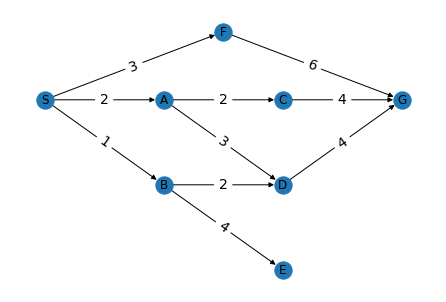

In [12]:
# locations needed to draw the nodes
locations = dict( 
    S=(0, 50), A=(50, 50), B=(50, 25),
    C=(100, 50), D=(100, 25), E=(100, 0),
    F=(75, 70), G=(150, 50)
)

costs = {(k, k2) : v2 for k, v  in problem_graph.graph_dict.items() for k2, v2 in v.items()}

DG = nx.DiGraph(problem_graph.graph_dict)
nx.draw(DG, pos=locations, with_labels=True)
nx.draw_networkx_edge_labels(DG, pos=locations, edge_labels=costs, font_size=14)
plt.show()

## Parameters

In [13]:
start = 'S'
end = 'G'

problem = GraphProblem(start, end, problem_graph)

### Breadth first graph search solution

In [14]:
bfs_path = breadth_first_search(problem)

print("Breadth First Search")
print_path(bfs_path)

print(f"Path Cost {bfs_path[-1].path_cost}")

Breadth First Search
S => F => G
Path Cost 9


### Depth first graph search solution

In [15]:
dfs_path = depth_first_search(problem)

print("Depth First Search")
print_path(dfs_path)

print(f"Path Cost {dfs_path[-1].path_cost}")

Depth First Search
S => A => C => G
Path Cost 8


### A*  graph search solution

In [16]:
a_star_path = astar_search(problem)

print("A* Search")
print_path(a_star_path)

print(f"Path Cost {a_star_path[-1].path_cost}")

A* Search
S => B => D => G
Path Cost 7


## 2. Write a program to compute the following heuristic function values for a state of the 8-puzzle problem given the goal state.
- Number of misplaced tiles
- Manhattan distance

In [17]:
import numpy as np
from numpy import ndarray
from tabulate import tabulate

In [18]:
def shuffle_board(puzzle_board: ndarray) -> ndarray:
    """
    Shuffle the tiles
    
    """
    
    flatten_board: ndarray = puzzle_board.flatten() # 2D array to 1D array
    perm: ndarray = np.random.permutation(flatten_board.shape[0])   # randomize the values using permutation
    shuffled_board: ndarray = flatten_board[perm].reshape(puzzle_board.shape)   # convert 1D array back to 2D
    
    return shuffled_board

In [19]:
def misplaced_tiles(old_board: ndarray, new_board: ndarray) -> int:
    """
    Count the misplaced tiles
    
    """

    # count variable to store the number of misplaced tiles
    __count = 0
    
    for i in range(new_board.shape[0]):
        for j in range(new_board.shape[1]):
            # compairing two arrays and if the element at the same position don't match 
            # and exclude for the new blank position
            # then increment the count variable by 1
            if old_board[i][j] != new_board[i][j] and new_board[i][j] != 0:
                print(f"Expected: {old_board[i][j]} But: {new_board[i][j]}")
                __count += 1

    return __count

In [20]:
def manhattan_distance(old_board: ndarray, new_board: ndarray) -> int:
    """
    Calculate Manhattan Distance
    
    """

    # convert the arrays into dictionary data structure
    new_board_dict = dict()
    old_board_dict = dict()
    
    for i in range(new_board.shape[0]):
        for j in range(new_board.shape[1]):
            old_board_dict.setdefault(f"{old_board[i][j]}", [i, j])
            new_board_dict.setdefault(f"{new_board[i][j]}", [i, j])


    # manhattan distance
    manhttn_dist = 0
    
    for tile in range(1, 9):    # 0 means no tile
        row_distance = abs(new_board_dict[f'{tile}'][0] - old_board_dict[f'{tile}'][0])
        col_distance = abs(new_board_dict[f'{tile}'][1] - old_board_dict[f'{tile}'][1])
        print(f"{tile}'s distance =  {row_distance + col_distance}")
        
        manhttn_dist += row_distance + col_distance

    return manhttn_dist

In [21]:
def print_board(puzzle_board: ndarray) -> None:
    modified_board: list = [[f'{j}' if j != 0 else 'X' for j in i ] for i in puzzle_board]
    print(tabulate(modified_board, tablefmt='grid'))

In [22]:
# 0 means blank tile
eight_puzzle_board = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])

print_board(eight_puzzle_board)

+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
| 4 | 5 | 6 |
+---+---+---+
| 7 | 8 | X |
+---+---+---+


In [23]:
new_board = shuffle_board(eight_puzzle_board)

print(f"The shuffled board is ")
print_board(new_board)

The shuffled board is 
+---+---+---+
| X | 1 | 3 |
+---+---+---+
| 2 | 7 | 6 |
+---+---+---+
| 8 | 5 | 4 |
+---+---+---+


### Number of misplaced tiles

In [24]:
misplaced_tiles: int = misplaced_tiles(eight_puzzle_board, new_board)
print(f"\nThere are(/is) {misplaced_tiles} misplaced tile(s).\n")

Expected: 2 But: 1
Expected: 4 But: 2
Expected: 5 But: 7
Expected: 7 But: 8
Expected: 8 But: 5
Expected: 0 But: 4

There are(/is) 6 misplaced tile(s).



### Manhattan distance

In [25]:
m_d = manhattan_distance(eight_puzzle_board, new_board)
print(f"\nManhattan Distance is {m_d}")

1's distance =  1
2's distance =  2
3's distance =  0
4's distance =  3
5's distance =  1
6's distance =  0
7's distance =  2
8's distance =  1

Manhattan Distance is 10


## 3. Write a program to find out the number of pairs of queens attacking each other in a given board position for the 8-queens problem.

In [26]:
def make_board(queen_rows: list) -> tuple[list, list]:
    """
    Creating chess board with the queen positions given as a list,
    returns the chess board and the queen positions
    """

    # chess board
    # initially all are 0s
    chess_board: list = [[0 for _ in range(8)] for _ in range(8)]

    # queen positions
    queen_positions: list = []

    # adding queens
    for col, row in enumerate(queen_rows):
        # change the queen positions to 1
        chess_board[row][col] = 1

        # adding the queen positions in the list
        queen_positions.append([row, col])

    return chess_board, queen_positions

In [27]:
def attacking(queen_positions: list) -> list:
    """
    Calculating the pair of attacking queens
    """

    # to track if the attacking pair occurs multiple times
    attacking_set: list = []

    # store the pairs
    attacking_pairs: list = []

    for pos_1 in queen_positions:
        for pos_2 in queen_positions:  # comparing each of the queen with each queens in the board
            if pos_1 != pos_2:  # except one compairing oneself

                # if the reverse of the pair not in the list
                # then add the pair the attacking set else don't
                if [pos_2, pos_1] not in attacking_set:

                    # two queens attack each other
                    # if two queens are on same row or they are on the diagonal
                    is_same_row: bool = pos_1[0] == pos_2[0]
                    is_diagonal: bool = abs(pos_1[0] - pos_2[0]) == abs(pos_1[1] - pos_2[1])

                    # add to the attacking pair if they are attacking
                    if is_same_row or is_diagonal:
                        attacking_pairs.append([pos_1, pos_2])

                    attacking_set.append([pos_1, pos_2])

    return attacking_pairs

In [28]:
def print_board(chs_board: list) -> None:
    """
    Print the chess board
    """
    for row in chs_board:
        for col in row:
            print(col, end=' ')
        print()

In [29]:
# columns are fixed
# so we've only to define the rows
# in this case the position of the element is the column position
queen_position_rows: list[int] = [6, 4, 2, 0, 5, 7, 1, 2]

chess_board, queen_positions = make_board(queen_position_rows)
attacking_pairs = attacking(queen_positions)

print("The chess board:")
print_board(chess_board)

print(f"\nThere is(/are) {len(attacking_pairs)} pair(s) of queens attacking each other")

print("\nThe pairs are: ")
for pair in attacking_pairs:
    print(f"{pair[0]} x {pair[1]}")

The chess board:
0 0 0 1 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 1 0 0 0 0 1 
0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 
1 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 

There is(/are) 3 pair(s) of queens attacking each other

The pairs are: 
[2, 2] x [2, 7]
[5, 4] x [2, 7]
[1, 6] x [2, 7]


### showing the chess board

In [30]:
import numpy as np
import pandas
from matplotlib.table import Table


def checkerboard_table(data, bkg_colors=None):
    data = pandas.DataFrame(data,
                            columns=range(8))
    if bkg_colors is None:
        bkg_colors = ['black', 'white']
    fig, ax = plt.subplots()
    ax.set_axis_off()

    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows = ncols = 8

    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]
        c = 'white' if bkg_colors[idx] == 'black' else 'black'

        tb.add_cell(i, j, width, height, text="♛" if val == 1 else '',
                    loc='center', facecolor=color).set_text_props(c=c)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right',
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height / 2, text=label, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)
    plt.show()


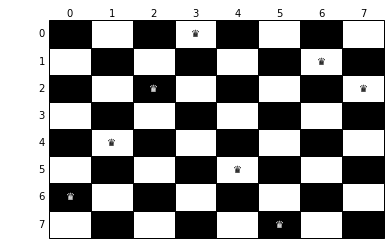

In [31]:
# plot the checker board with the queens
checkerboard_table(chess_board)

## 4. Write a program to compute a heuristic function value to indicate whether a given board position in tic-tac-toe game is favourable to the ‘x’ player.

In [32]:
from tabulate import tabulate


# Get 'X' and 'O' at random positions
def get_positions():   
    x_pos = np.random.randint(9)
    o_pos = np.random.randint(9)

    # check if two positions are same
    if x_pos == o_pos:
        if o_pos == 0:      # edge case number 1
            x_pos = np.random.randint(1, 9)
        elif o_pos == 8:    # edfe case number 2
            x_pos = np.random.randint(8)
        else:
            first = np.random.randint(o_pos)
            second = np.random.randint(o_pos + 1, 9)
            x_pos = [first, second][np.random.randint(2)]

    return x_pos, o_pos


def convert_row_col(positions, player):
    x_pos, o_pos = positions
    if player == 2: 
        row, col = x_pos // 3, x_pos % 3
    elif player == 1:
        row, col = o_pos // 3, o_pos % 3
    return row, col


# Check if they are on the same row
def same_row(positions):    
    return 0 if convert_row_col(positions, 2)[0] == convert_row_col(positions, 1)[0] else 1


# Check if they are on the same column
def same_col(positions):    
    return 0 if convert_row_col(positions, 2)[1] == convert_row_col(positions, 1)[1] else 1


# Check if they are on the same diagonal
def same_diagonal(positions, player):
    x_row, x_col = convert_row_col(positions, 2)
    o_row, o_col = convert_row_col(positions, 1)

    if player == 'X':
        player_row, player_col = convert_row_col(positions, 2)
        other_player_row, other_player_col = convert_row_col(positions, 1)
    elif player == 'O':
        player_row, player_col = convert_row_col(positions, 1)
        other_player_row, other_player_col = convert_row_col(positions, 2)
        

    if player_row == player_col and player_row != 1:
        return 0 if other_player_row == other_player_col else 1
    
    elif player_row == player_col and player_row == 1:
        if other_player_row == other_player_col or abs(other_player_row - other_player_col) == 2:
            return 1
        else:
            return 2
            
    elif abs(player_row - player_col) == 2:
        return 0 if abs(other_player_row - other_player_col) == 2 or other_player_row == other_player_col  else 1
    else:
        return 0


# create a board
def board(positions):
    """
    2 means X
    1 means O
    """
    x_row, x_col = convert_row_col(positions, 2)
    o_row, o_col = convert_row_col(positions, 1)
    
    board = np.zeros((3, 3))
    board[x_row][x_col] = 2
    board[o_row][o_col] = 1

    board_ = []
    for i in board:
        row = []
        for j in i:
            if j == 2:
                row.append('X')
            elif j == 1:
                row.append('O')
            else:
                row.append('_')
        board_.append(row)

    print(tabulate(board_, tablefmt='grid'))


def evaluate_winning(player):
    postns = get_positions()
    board(postns)
    row_wise_win = same_row(postns)
    col_wise_win = same_col(postns)
    
    x_diag_wise_win = same_diagonal(postns, 'X')
    o_diag_wise_win = same_diagonal(postns, 'O')
    
    x_total_winning = row_wise_win + col_wise_win + x_diag_wise_win
    o_total_winning = row_wise_win + col_wise_win + o_diag_wise_win

    if player == 'X':
        if x_total_winning > o_total_winning:
            return 'favourable'
        elif x_total_winning == o_total_winning:
            return 'chances are equal for both'
        else:
            return 'not favourable'
    elif player == 'O':
        if o_total_winning > x_total_winning:
            return 'favourable'
        elif o_total_winning == x_total_winning:
            return 'chances are equal for both'
        else:
            return 'not favourable'

In [33]:
eval_winning_X = evaluate_winning('X')

print(f"The position of player X indicates: {eval_winning_X}")

+---+---+---+
| O | _ | _ |
+---+---+---+
| _ | _ | _ |
+---+---+---+
| _ | _ | X |
+---+---+---+
The position of player X indicates: chances are equal for both


## 5. Write a program to find the maximum value of f=100*sin(x)/x and the corresponding value of x in the range 10<x<30 using ```genetic algorithm```.

In [34]:
range_ = [10, 30]


def func(x):
    return 100 * np.sin(x) / x


def make_chromosome(size):
    return ''.join(map(str, np.random.randint(2, size=size)))


def make_population(pop_size: int, chrom_length: int):
    return [make_chromosome(chrom_length) for _ in range(pop_size)]


def fitness(chromosome):
    decoded_value = int(chromosome, 2)
    value = range_[0] + ((range_[1] - range_[0]) / (np.power(2, len(chromosome)) - 1)) * decoded_value
    return func(value)


def conversion(chromosome):
    decoded_value = int(chromosome, 2)
    value = range_[0] + ((range_[1] - range_[0]) / (np.power(2, len(chromosome)) - 1)) * decoded_value
    return value


def max_with_index(list_: list):
    max_element = max(list_)
    return max_element, list_.index(max_element)


def binary_tournament(chrom_1, chrom_2):
    return chrom_1 if fitness(chrom_1) >= fitness(chrom_2) else chrom_2


def single_point_crossover(chrom_1, chrom_2):
    assert len(chrom_1) == len(chrom_2), "Different sizes of chromosomes"

    cp = np.random.randint(len(chrom_1))
    child_1 = chrom_1[:cp] + chrom_2[cp:]
    child_2 = chrom_2[:cp] + chrom_1[cp:]
    return child_1, child_2


def selection(population: list):
    mat_pool = []
    while len(mat_pool) <= len(population):
        chrom_1 = population[np.random.randint(len(population))]
        chrom_2 = population[np.random.randint(len(population))]
        best_chrom = binary_tournament(chrom_1, chrom_2)
        mat_pool.append(best_chrom)

    return mat_pool


def crossover(population: list, cross_prob: float):
    xpopulation = []
    parent_1 = population[np.random.randint(len(population))]
    parent_2 = population[np.random.randint(len(population))]

    if np.random.random() < cross_prob:
        child1, child2 = single_point_crossover(parent_1, parent_2)
        xpopulation.extend([child1, child2])
    else:
        xpopulation.extend([parent_1, parent_2])
    return xpopulation


def mutate(chrom: str, mp: float) -> str:
    c = list(map(int, chrom))
    for pos in range(len(c)):
        if np.random.random() < mp:
            c[pos] = int(not c[pos])

    return ''.join(map(str, c))


def mutation(population: list, mut_prob: float) -> None:
    for i, chrom in enumerate(population):
        population[i] = mutate(chrom, mut_prob)


def genetic_algorithm(pop_size, chrom_len, max_iter, cross_prob, mut_prob):
    pop = make_population(pop_size, chrom_len)
    fit = list(map(fitness, pop))
    best_fits = []
    avg_fits = []
    sols = []

    i = 0
    while i < max_iter:
        best_fits.append(max(fit))
        avg_fits.append(np.mean(fit))
        mpool = selection(pop)
        xpop = crossover(mpool, cross_prob)
        mutation(xpop, mut_prob)
        child_best_fit = list(map(fitness, xpop))

        # elitism
        old_best, old_i = max_with_index(fit)
        new_best, new_i = max_with_index(child_best_fit)

        if old_best >= new_best:
            xpop[new_i] = pop[old_i]
            child_best_fit[new_i] = fit[new_i]

        sols.append(conversion(xpop[new_i]))

        pop = xpop
        fit = child_best_fit

        i += 1

    f = list(map(fitness, pop))
    f_max, max_i = max(f), f.index(max(f))
    print(conversion(pop[max_i]), f_max)

    plt.figure(figsize=(8, 6), dpi=200)

    plt.subplot(2, 1, 1)
    plt.plot(avg_fits, label='Avg. Fitness')
    plt.plot(best_fits, label='Best Fitness')
    plt.legend()
    plt.grid()
    plt.title(f"Genetic Algorithm\ncrossover_prob = {cross_prob}, mutation_prob={mut_prob}")

    plt.subplot(2, 1, 2)
    x = np.linspace(range_[0], range_[1], 1000)
    plt.scatter(conversion(pop[max_i]), f_max, c='red', marker='x', s=60, zorder=3)
    plt.scatter(sols, func(sols), c='black', s=4, alpha=0.3, zorder=2)
    plt.plot(x, func(x), zorder=1)
    plt.grid()
    plt.xlabel("$x$")
    plt.ylabel(r"$f(x)=100 \frac{\sin(x)}{x}$")

    plt.show()

14.04692082111437 7.090027733609426


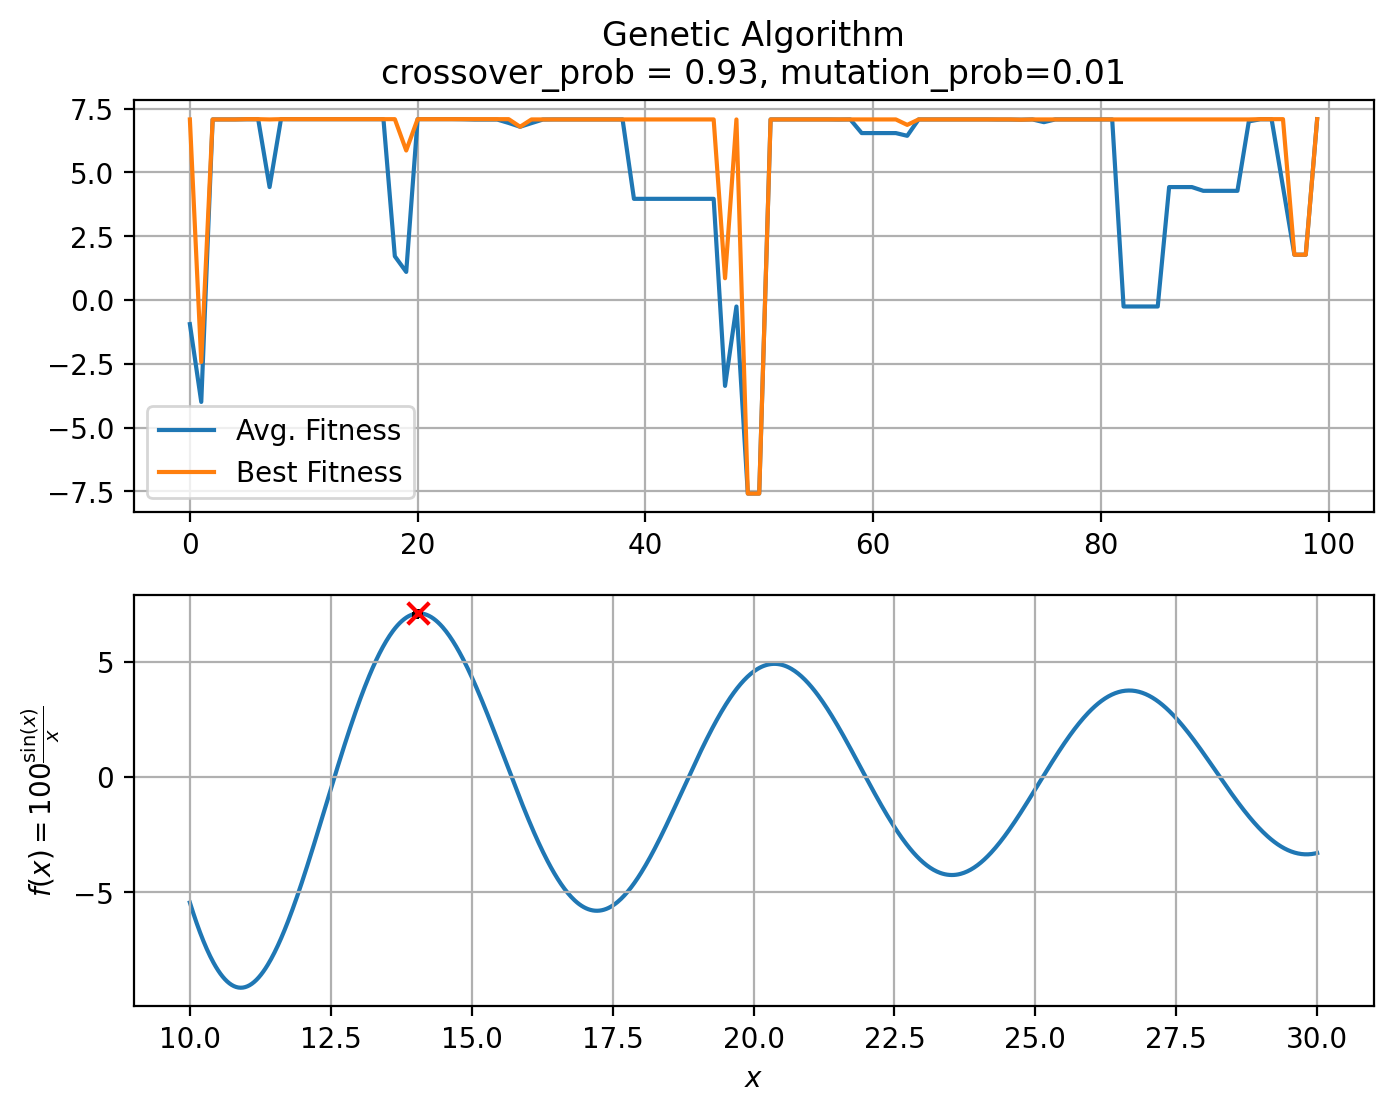

In [35]:
poplutation_size = 100
chrom_len = 10
max_iter = 100
cross_prob = 0.93
mut_prob = 0.01


genetic_algorithm(poplutation_size, chrom_len, max_iter, cross_prob, mut_prob)

## 6. Write a program to find the minimum value of f=100*sin(x)/x and the corresponding value of x in the range 0<x<20 using ```simulated annealing```.

In [36]:
def make_binary_string(size):
    return ''.join(map(str, np.random.randint(2, size=size)))


def bin_to_dec_map(binary_str: str, bounds: list):
    """
    Convert binary string to a decimal value and map to a given bouds
    
    """
    
    decoded_value = int(binary_str, 2)
    value = bounds[0] + ((bounds[1] - bounds[0]) / (np.power(2, len(binary_str)) - 1)) * decoded_value
    return value


def perturb(state: str, prob: float) -> str:
    """Perturbation"""
    s: list = list(map(int, state))
    
    for pos in range(len(s)):
        if np.random.random() < prob:
            s[pos] = int(not s[pos])

    return ''.join(map(str, s))
        
    
def simulated_annealing(objective,
                        bounds,
                        bs_size,
                        t_max, t_min,
                        max_iter=10,
                        perturb_prob=0.6,
                        k=0.7,
                        plot=True) -> None:

    # random initial state
    current_state: str = make_binary_string(bs_size)

    # Initial energy
    current_energy: float = objective(bin_to_dec_map(current_state, bounds))

    # initial large temperature
    T = t_max

    # plotting helpers
    ts = [T]
    es = [current_energy]
    bs = [bin_to_dec_map(current_state, bounds)]
    accpt_probs = []

    # run until temperature reduces to a minimum value
    while T > t_min:

        # staying at that temperature for 
        for _ in range(max_iter):

            # new state from the initial state using purturb
            next_state = perturb(current_state, perturb_prob)

            # calculate the energy of the new state
            next_energy = objective(bin_to_dec_map(next_state, bounds))

            # difference between new and old state's energies
            delta_energy = next_energy - current_energy

            # check if the difference is less than equal to 0
            # or in prob e^(- delE / kT)
            # means the successor is better than parent and it is minimization problem

            # acceptance probability
            accpt_prob = np.exp(- delta_energy / (k * T))
            
            if delta_energy <= 0 or np.random.random() < accpt_prob:
                
                # old state is the new state
                current_state = next_state

                # old energy is the new energy
                current_energy = next_energy

        # cooling temperature
        T *= 0.9
        
        ts.append(T)
        es.append(current_energy)
        bs.append(bin_to_dec_map(current_state, bounds))
        accpt_probs.append(accpt_prob)


    best_sol = bin_to_dec_map(current_state, bounds)
    
    print(f"The Global Minimum is at: x = {best_sol}")
    

    if plot:
        plt.figure(figsize=(12, 8))
        # first plot
        plt.subplot(2, 2, 1)
        x = np.linspace(bounds[0], bounds[1], 1000)
        plt.plot(x, objective(x), zorder=1)
        plt.scatter(best_sol, objective(best_sol), c='r', zorder=3)
        plt.title("Global Minimum")
        plt.xlabel("$x$")
        plt.ylabel(r"$f(x)=100*\frac{\sin(x)}{x}$")
        
        
        # second plot
        plt.subplot(2, 2, 2)
        plt.plot(es)
        plt.title("Cost")
        plt.xlabel("Step")
        plt.ylabel("Energy")

        # third plot
        plt.subplot(2, 2, 3)
        plt.plot(accpt_probs, '.')
        plt.xlabel("Step")
        plt.ylabel("Acceptance Probability")

        # fourth plot
        plt.subplot(2, 2, 4)
        plt.plot(ts)
        plt.xlabel("Step")
        plt.ylabel("Temperature")

        plt.savefig('SA1.jpg', dpi=200)
        plt.show()


The Global Minimum is at: x = 4.5294196078431375


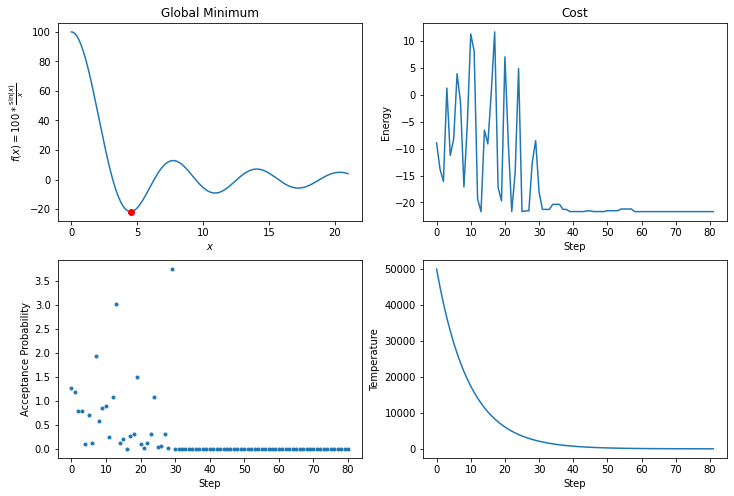

In [37]:
# objective function
def obj_func(x):
    return 100 * np.sin(x) / x


# limits
bounds = [0.00001, 21]

# binary string size
bs_size = 8

# max and min temperature
max_temp, min_temp = 50000, 10

m_iter = 50

# perturbation probability
perturb_prob = 0.6

# Boltzman constant
k_b = 1.380649e-3

simulated_annealing(obj_func, bounds, bs_size, max_temp, min_temp, m_iter, perturb_prob, k_b, plot=True)

## 7. Write a program to find the minimum value of f=x*(x-4)+y*(y-5) and the corresponding values of x and y in the range -20<x,y<20 using ```gradient descent```.

In [38]:
from typing import Callable


def func_xy(x, y):
    return x * (x - 4) + y * (y - 5) 


def x_deriv(x):
    return 2 * x - 4


def y_deriv(y):
    return 2 * y - 5



def gradient_descent(x_start: float,
                     y_start: float,
                     func: Callable[[float, float], float],
                     learn_rate: float,
                     max_iter: int,
                     tol: float = 0.01) -> tuple[list[float], float]:
    """
    Gradient Descent algorithm implementation

    :param start: starting piont
    :param func: given function
    :param learn_rate: learning rate of the algorithm
    :param max_iter: max iteration
    :param tol: tolerance level
    """
    
    x: float = x_start
    y: float = y_start

    steps = [[x, y]]

    for _ in range(max_iter):
        x_diff: float = learn_rate * x_deriv(x)
        y_diff: float = learn_rate * y_deriv(y)

        if np.abs(x_diff) < tol and np.abs(y_diff) < tol:
            break

        x -= x_diff
        y -= y_diff

        steps.append([x, y])

    return x, y, steps

The result is (2.0, 2.50509367066624)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


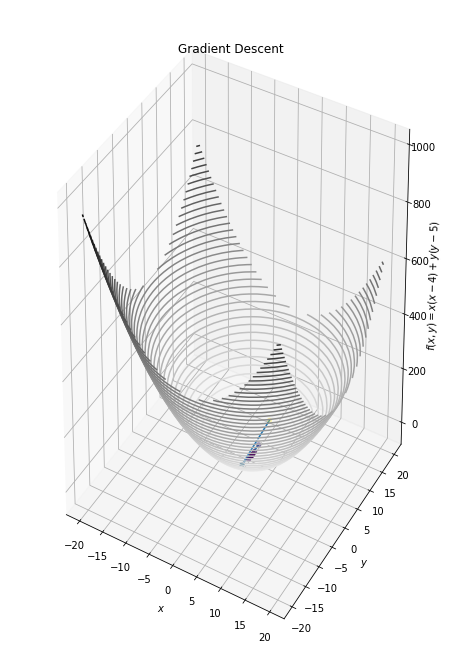

In [39]:
lower_bound = -20.0
upper_bound = 20.0

lr = 0.8


# random starting point
x_starting_point = np.random.randint(lower_bound, upper_bound)
y_starting_point = np.random.randint(lower_bound, upper_bound)


# result
x, y, steps = gradient_descent(x_starting_point, y_starting_point, func_xy, lr, 100)

print(f"The result is {x, y}")


x = y = np.linspace(-20, 20, 30)
X, Y = np.meshgrid(x, y)
Z = func_xy(X, Y)


fig = plt.figure(figsize=(8, 12))


x_s = [step[0] for step in steps]
y_s = [step[1] for step in steps ]
z_s = [func_xy(i, j)  for i, j in zip(x_s, y_s)]


ax = plt.axes(projection='3d')
ax.scatter(x_s, y_s, z_s, c=z_s, cmap='viridis', linewidth=0.5);
ax.plot3D(x_s, y_s, z_s)
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)=x(x-4)+y(y-5)$')
ax.set_title('Gradient Descent')


plt.show()